# 1. Import Library

In [1]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy

from keras.datasets import cifar10

# For tensorflow.keras
#from tensorflow.keras.datasets import cifar10

import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

# For tensorflow.keras
#from tensorflow.keras.utils import to_categorical
#y_label_train_OneHot = to_categorical(y_label_train)
#y_label_test_OneHot = to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

# For tensorflow.keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1與池化層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層3與池化層3

In [14]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [20]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=100, batch_size=300, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 116us/step - loss: 1.9013 - accuracy: 0.2874 - val_loss: 1.7536 - val_accuracy: 0.3526
Epoch 2/100
40000/40000 [==============================] - 3s 77us/step - loss: 1.4721 - accuracy: 0.4555 - val_loss: 1.4409 - val_accuracy: 0.4876
Epoch 3/100
40000/40000 [==============================] - 3s 76us/step - loss: 1.2506 - accuracy: 0.5485 - val_loss: 1.1795 - val_accuracy: 0.5799
Epoch 4/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.1150 - accuracy: 0.6033 - val_loss: 1.0247 - val_accuracy: 0.6466
Epoch 5/100
40000/40000 [==============================] - 3s 78us/step - loss: 0.9924 - accuracy: 0.6471 - val_loss: 0.9263 - val_accuracy: 0.6788
Epoch 6/100
40000/40000 [==============================] - 3s 75us/step - loss: 0.9084 - accuracy: 0.6787 - val_loss: 0.8687 - val_accuracy: 0.6975
Epoch 7/100
40000/40000 [==============================] - 3s

Epoch 56/100
40000/40000 [==============================] - 3s 78us/step - loss: 0.1205 - accuracy: 0.9592 - val_loss: 0.7866 - val_accuracy: 0.8023
Epoch 57/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.1201 - accuracy: 0.9608 - val_loss: 0.8023 - val_accuracy: 0.7912
Epoch 58/100
40000/40000 [==============================] - 3s 75us/step - loss: 0.1230 - accuracy: 0.9584 - val_loss: 0.7823 - val_accuracy: 0.7982
Epoch 59/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.1220 - accuracy: 0.9580 - val_loss: 0.8046 - val_accuracy: 0.7957
Epoch 60/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.1215 - accuracy: 0.9587 - val_loss: 0.8229 - val_accuracy: 0.7924
Epoch 61/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.1180 - accuracy: 0.9588 - val_loss: 0.8052 - val_accuracy: 0.7966
Epoch 62/100
40000/40000 [==============================] - 3s 77us/step - loss: 0.1175 - accuracy: 0.9617

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

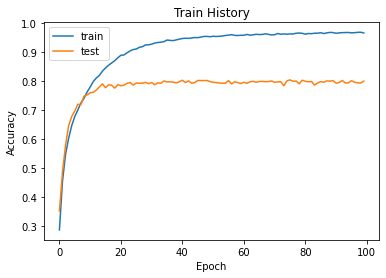

In [22]:
show_train_history('accuracy','val_accuracy')

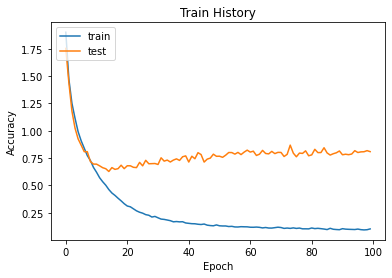

In [23]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(X_img_test_normalize, 
                        y_label_test_OneHot,verbose=0)
scores[1]

0.7900999784469604

# 進行預測

In [25]:
prediction=model.predict_classes(X_img_test_normalize)

In [26]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 9])

In [27]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [28]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

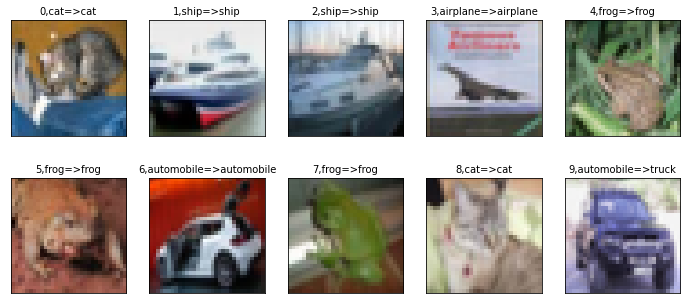

In [29]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [30]:
Predicted_Probability=model.predict(X_img_test_normalize)

In [31]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

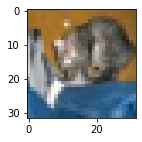

airplane Probability:0.000080050
automobile Probability:0.000033810
bird Probability:0.000350694
cat Probability:0.989845395
deer Probability:0.000033643
dog Probability:0.001429421
frog Probability:0.003991196
horse Probability:0.000054148
ship Probability:0.004173921
truck Probability:0.000007723


In [32]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

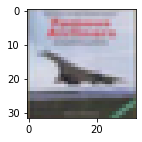

airplane Probability:0.988148630
automobile Probability:0.000019006
bird Probability:0.000286981
cat Probability:0.000869786
deer Probability:0.000131834
dog Probability:0.000000121
frog Probability:0.000000661
horse Probability:0.000003768
ship Probability:0.010332067
truck Probability:0.000207215


In [33]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# Save model to JSON

In [34]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [35]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [36]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
